# Data import and EDA

In [52]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numba
from sklearn.preprocessing import StandardScaler

CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 22.9 µs


In [242]:
df = pd.read_csv('/Users/yoo/Data-dev/algorithm/datasets/UBER.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...,...
600,2021-09-27,46.770000,47.430000,46.189999,47.250000,47.250000,23034800
601,2021-09-28,46.700001,47.000000,45.759998,45.980000,45.980000,23707900
602,2021-09-29,46.000000,46.529999,44.299999,44.520000,44.520000,24599500
603,2021-09-30,44.709999,45.365002,43.860001,44.799999,44.799999,16650600


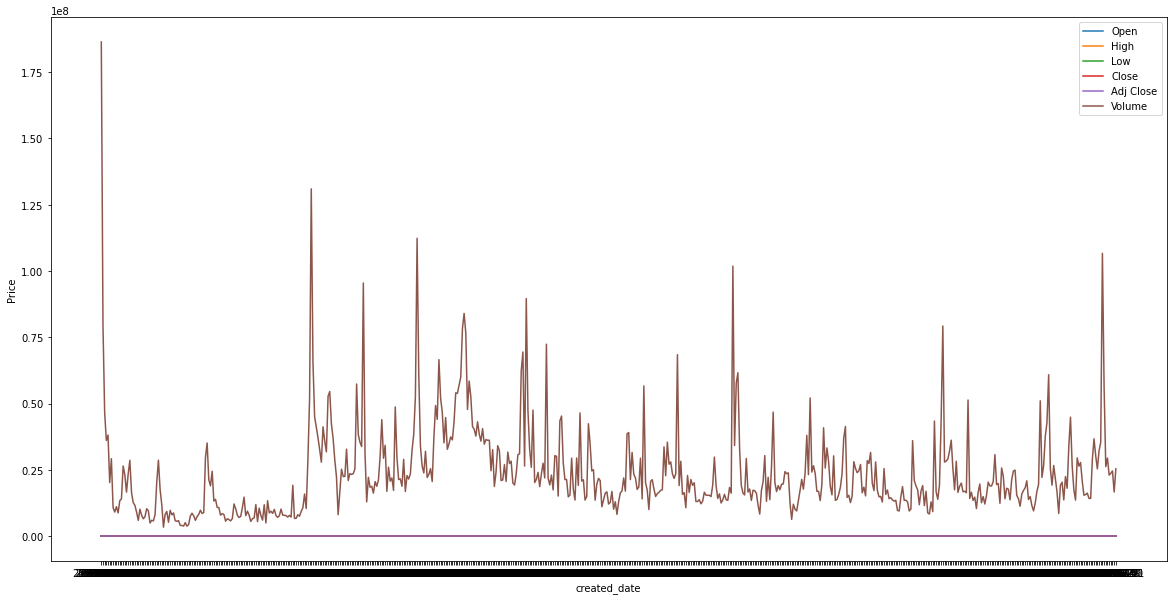

CPU times: user 7.1 s, sys: 2.28 s, total: 9.38 s
Wall time: 9.42 s


In [33]:
%%time
# It's to messy. So, I will go to preprocessing

plt.figure(figsize=(20,10))
plt.xlabel("created_date")
plt.ylabel("Price")
plt.plot(df_)
plt.legend(df_.columns)
plt.show()

### Pre-processing

In [61]:
scaler = StandardScaler()

scale = scaler.fit_transform(df[['Open','Close','High','Low','Volume']])
scale

array([[ 0.18011235,  0.14184436,  0.40424475,  0.17702611,  9.431271  ],
       [-0.14783937, -0.31758072, -0.17933609, -0.33948628,  3.2375573 ],
       [-0.19687889, -0.02363092, -0.10638877, -0.25962432,  1.33787731],
       ...,
       [ 0.58877504,  0.44504422,  0.55925836,  0.51307017,  0.05940513],
       [ 0.45698122,  0.47382241,  0.44122534,  0.46743473, -0.40123451],
       [ 0.58009106,  0.70507654,  0.63220609,  0.66760925,  0.1074332 ]])

In [68]:
df_scale = pd.DataFrame(scale)
df_scale.columns = ['Open','Close','High','Low','Volume']
df_scale = df_scale.set_index(df['Date'])
df_scale = df_scale[1:]
df_scale

,Open,Close,High,Low,Volume
Date,,,,,
2019-05-13,-0.147839,-0.317581,-0.179336,-0.339486,3.237557
2019-05-14,-0.196879,-0.023631,-0.106389,-0.259624,1.337877
2019-05-15,-0.088583,0.113066,0.088138,-0.041818,0.725055
2019-05-16,0.126986,0.288819,0.309008,0.196732,0.842659
2019-05-17,0.178069,0.176789,0.230994,0.198807,-0.194057
...,...,...,...,...,...
2021-09-27,0.667443,0.725633,0.650443,0.709096,-0.031269
2021-09-28,0.660291,0.595102,0.606877,0.664497,0.007737
2021-09-29,0.588775,0.445044,0.559258,0.513070,0.059405


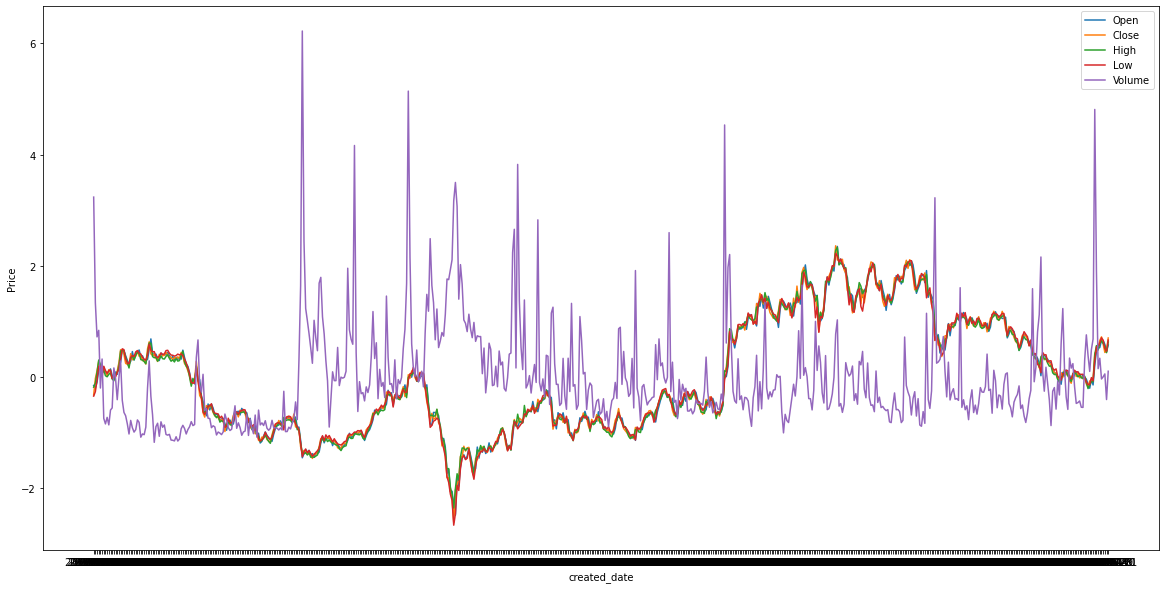

CPU times: user 7.06 s, sys: 2.26 s, total: 9.32 s
Wall time: 9.36 s


In [69]:
%%time
# Ok, Again

plt.figure(figsize=(20,10))
plt.xlabel("created_date")
plt.ylabel("Price")
plt.plot(df_scale)
plt.legend(df_scale.columns)
plt.show()

In [89]:
df_scale['day_before_open'] = df_scale['Open'].shift(1)
df_scale = df_scale.dropna()
df_scale

<ipython-input-89-6f30717610fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale['day_before_open'] = df_scale['Open'].shift(1)


,Open,Close,High,Low,Volume,day_after_open,day_before_open
Date,,,,,,,
2019-05-20,0.097358,0.143900,0.067875,0.011078,0.327297,0.178069,0.178069
2019-05-21,0.180112,0.134650,0.124612,0.196732,-0.740109,0.097358,0.097358
2019-05-22,0.083055,0.108955,0.027349,0.118944,-0.839401,0.180112,0.180112
2019-05-23,0.057513,0.028787,0.008099,0.069160,-0.721739,0.083055,0.083055
2019-05-24,0.106553,0.135677,0.050651,0.118944,-0.856943,0.057513,0.057513
...,...,...,...,...,...,...,...
2021-09-24,0.533605,0.661909,0.611436,0.615854,0.340973,0.522367,0.522367
2021-09-27,0.667443,0.725633,0.650443,0.709096,-0.031269,0.533605,0.533605
2021-09-28,0.660291,0.595102,0.606877,0.664497,0.007737,0.667443,0.667443


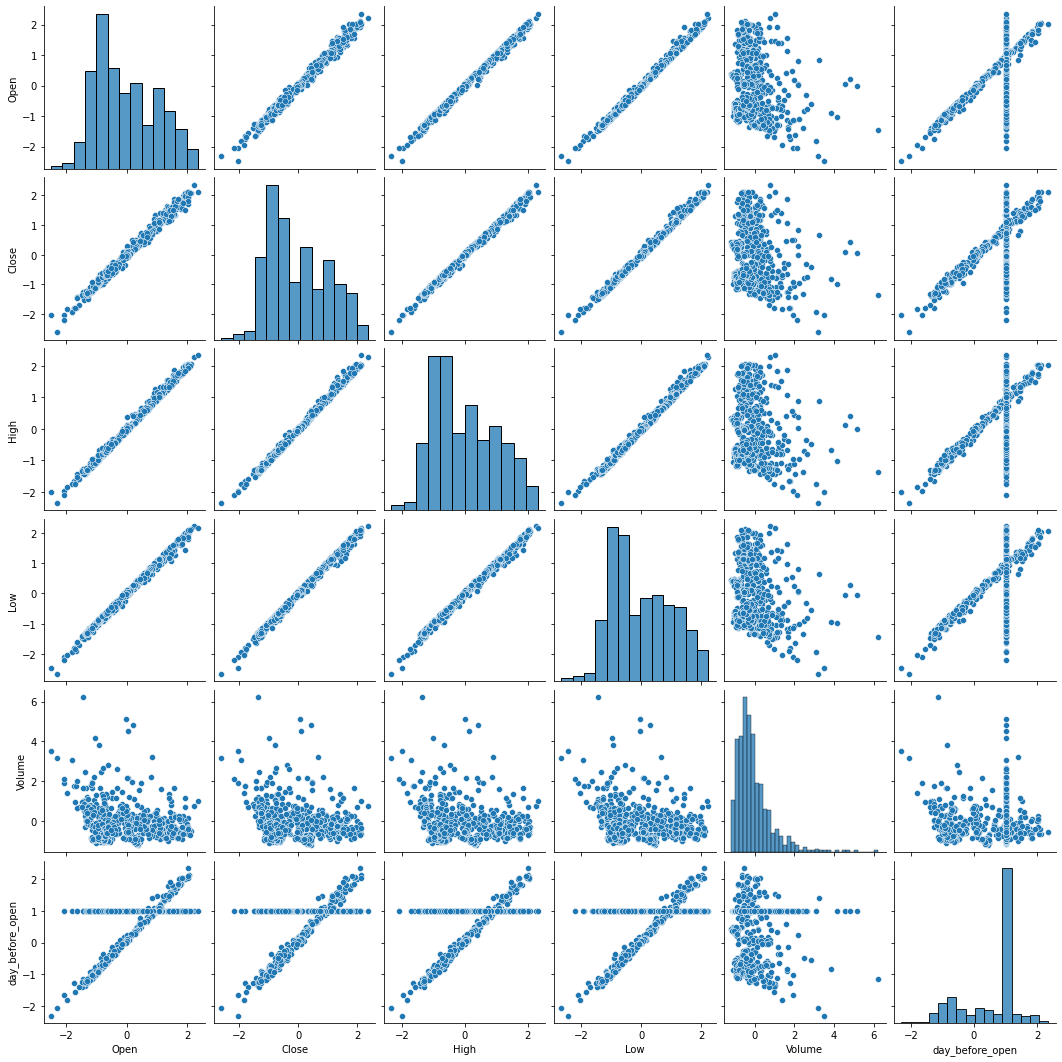

In [166]:
%%time
sns.pairplot(df_scale)

In [167]:
df_scale['Open'].corr(df_scale['Volume'])

-0.2353405773990903

In [175]:
for i in df_scale.iterrows():
    if i[1]['Open'] > i[1]['day_before_open']:
        df_scale['labels'] = 1
    else:
        df_scale['labels'] = 0
        
df_scale

<ipython-input-175-95681b9fc1e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale['labels'] = 0
<ipython-input-175-95681b9fc1e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale['labels'] = 1


,Open,Close,High,Low,Volume,day_before_open,labels
Date,,,,,,,
2019-05-20,0.097358,0.143900,0.067875,0.011078,0.327297,0.178069,0
2019-05-21,0.180112,0.134650,0.124612,0.196732,-0.740109,1.000000,0
2019-05-22,0.083055,0.108955,0.027349,0.118944,-0.839401,0.180112,0
2019-05-23,0.057513,0.028787,0.008099,0.069160,-0.721739,0.083055,0
2019-05-24,0.106553,0.135677,0.050651,0.118944,-0.856943,1.000000,0
...,...,...,...,...,...,...,...
2021-09-24,0.533605,0.661909,0.611436,0.615854,0.340973,1.000000,0
2021-09-27,0.667443,0.725633,0.650443,0.709096,-0.031269,1.000000,0
2021-09-28,0.660291,0.595102,0.606877,0.664497,0.007737,0.667443,0


In [182]:
tmp_df = df_scale[['Open','day_before_open']]
tmp_df

,Open,day_before_open
Date,,
2019-05-20,0.097358,0.178069
2019-05-21,0.180112,1.000000
2019-05-22,0.083055,0.180112
2019-05-23,0.057513,0.083055
2019-05-24,0.106553,1.000000
...,...,...
2021-09-24,0.533605,1.000000
2021-09-27,0.667443,1.000000
2021-09-28,0.660291,0.667443


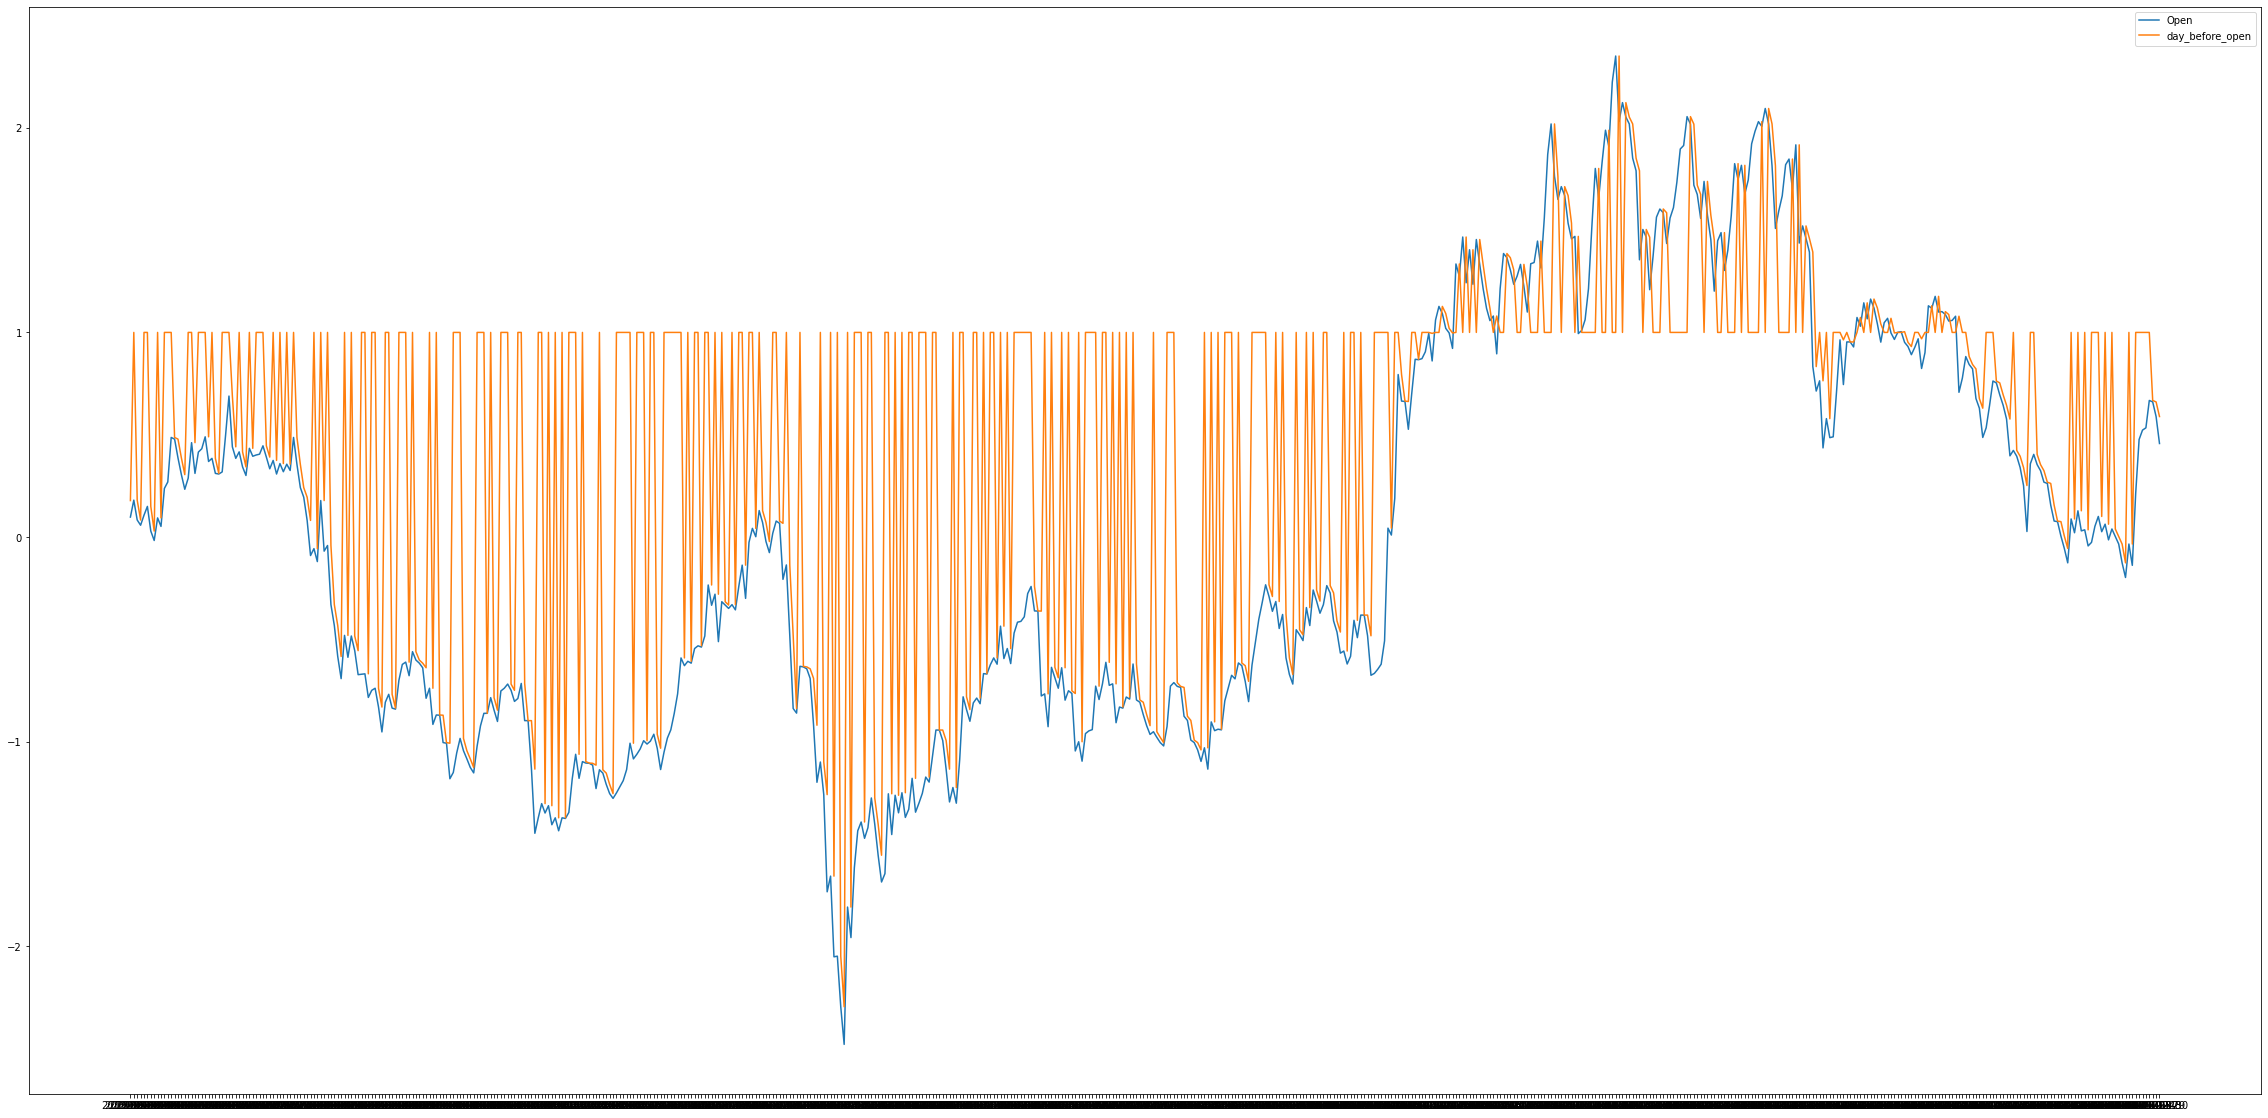

CPU times: user 7.37 s, sys: 2.37 s, total: 9.74 s
Wall time: 9.8 s


In [186]:
%%time
plt.figure(figsize=(40,20))
plt.plot(tmp_df)
plt.legend(tmp_df.columns)
plt.show()

### Regression EDA

In [243]:
df = df[['Date','Open']]
df

,Date,Open
0,2019-05-10,42.000000
1,2019-05-13,38.790001
2,2019-05-14,38.310001
3,2019-05-15,39.369999
4,2019-05-16,41.480000
...,...,...
600,2021-09-27,46.770000
601,2021-09-28,46.700001
602,2021-09-29,46.000000
603,2021-09-30,44.709999


In [244]:
df['before'] = df['Open'].shift(1)
df

<ipython-input-244-28b0de870253>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['before'] = df['Open'].shift(1)


,Date,Open,before
0,2019-05-10,42.000000,NaN
1,2019-05-13,38.790001,42.000000
2,2019-05-14,38.310001,38.790001
3,2019-05-15,39.369999,38.310001
4,2019-05-16,41.480000,39.369999
...,...,...,...
600,2021-09-27,46.770000,45.459999
601,2021-09-28,46.700001,46.770000
602,2021-09-29,46.000000,46.700001
603,2021-09-30,44.709999,46.000000


In [245]:
labels = []

for i in df.iterrows():
    if i[1]['Open'] > i[1]['before']:
        labels.append(1)
    else:
        labels.append(0)
        
df_labels = pd.DataFrame(labels, columns=['labels'])
df_labels

,0
0,0
1,0
2,0
3,1
4,1
...,...
600,1
601,0
602,0
603,0


In [247]:
df = pd.concat([df,df_labels],axis=1)
df = df.dropna(axis=0)
df = df[['Date','Open','labels']]
df

,Date,Open,labels
1,2019-05-13,38.790001,0
2,2019-05-14,38.310001,0
3,2019-05-15,39.369999,1
4,2019-05-16,41.480000,1
5,2019-05-17,41.980000,1
...,...,...,...
600,2021-09-27,46.770000,1
601,2021-09-28,46.700001,0
602,2021-09-29,46.000000,0
603,2021-09-30,44.709999,0


In [248]:
df = df.set_index('Date')
df

,Open,labels
Date,,
2019-05-13,38.790001,0
2019-05-14,38.310001,0
2019-05-15,39.369999,1
2019-05-16,41.480000,1
2019-05-17,41.980000,1
...,...,...
2021-09-27,46.770000,1
2021-09-28,46.700001,0
2021-09-29,46.000000,0


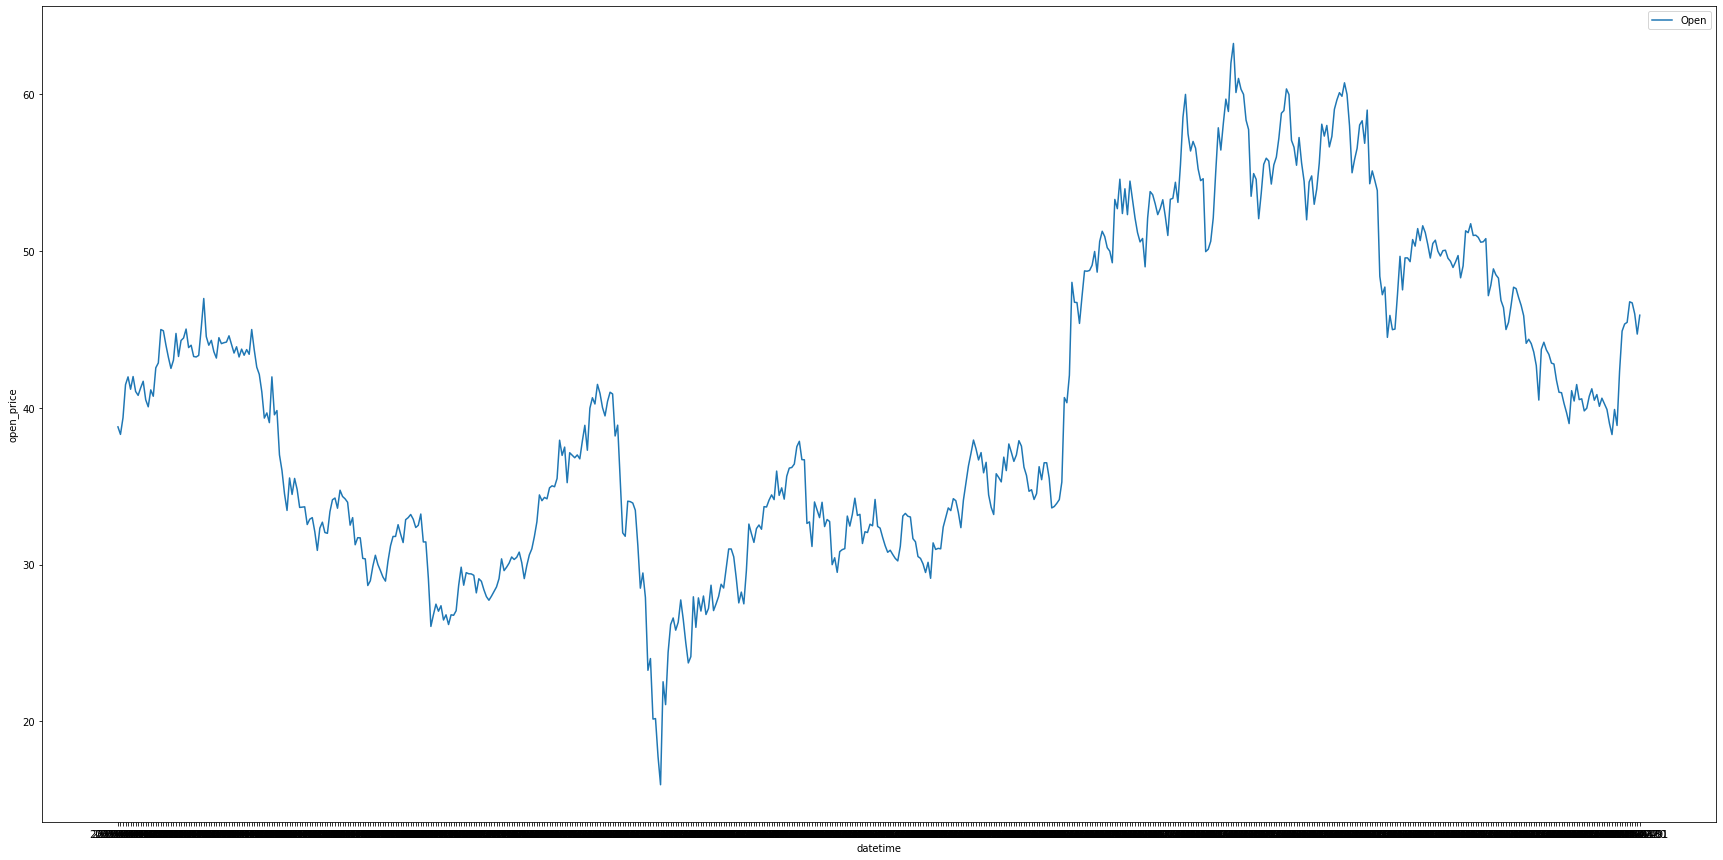

In [250]:
plt.figure(figsize=(30,15))
plt.xlabel("datetime")
plt.ylabel("open_price")
plt.plot(df['Open'])
plt.legend(df.columns)
plt.show()

/Users/yoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='labels', ylabel='Open'>

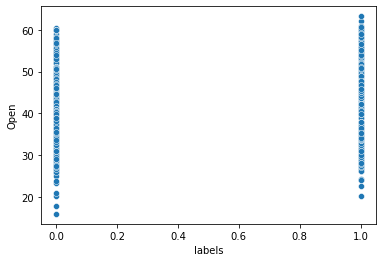

In [271]:
sns.scatterplot(df['labels'],df['Open'])

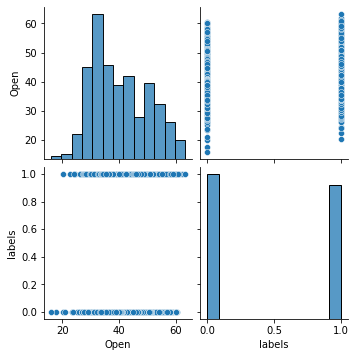

In [255]:
sns.pairplot(df)

### Regression Model

In [275]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [300]:
# Rogistic_regression

a = pd.DataFrame(scaler.fit_transform(df[['Open']]))[:500]
b = pd.DataFrame(scaler.fit_transform(df[['Open']]))[500:]

In [294]:
# linear_regression

x_train = np.array(df['Open'][:500]).reshape(1,-1)
x_test = np.array(df['Open'][:500]).reshape(1,-1)
y_train = np.array(df['labels'][500:]).reshape(1,-1)
y_test = np.array(df['labels'][500:]).reshape(1,-1)

In [301]:
# fitting

lr.fit(a, df['labels'][:500])
accuracy = lr.score(b, df['labels'][500:])
print("Logistic Regression accuracy:", accuracy)

Logistic Regression accuracy: 0.5


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [302]:
lr.coef_

array([[0.12472805]])

# sqlalchemy

In [3]:
%%time
import pandas as pd
from sqlalchemy import create_engine

CPU times: user 14 µs, sys: 1e+03 ns, total: 15 µs
Wall time: 21 µs


In [38]:
try:
    sql_engine = create_engine('sqlite://', echo=False)
except Exception as e:
    print(e)

In [41]:
df = pd.read_csv('/Users/yoo/Data-dev/algorithm/datasets/submission.csv')
df

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,0.779951
1,ba88c155ba898fc8b5099893036ef205,0.631095
2,7cbab5cea99169139e7e6d8ff74ebb77,0.343702
3,ca820ad57809f62eb7b4d13f5d4371a0,0.611596
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.312271
...,...,...
131068,71167eb6a22ce6d522f16b91d05b64a8,0.114463
131069,9d75343201d4342dcd36af092efca461,0.395790
131070,5c8eb44b2d637d2c11fec42a7c759b10,0.955824
131071,a8d80ea57440cad3aefd3a7677454647,0.659091


In [42]:
df.to_sql('submission',sql_engine)

In [49]:
query = sql_engine.execute(
"""
select id,
       case when target > 0.8 then '고점'
            when target > 0.6 then '중점'
            when target > 0.4 then '저점'
            when target > 0.2 then '최저점' else '거의없음' end as target_category
from submission
where target > 0.5
""").fetchall()
query

[('1c13f2701648e0b0d46d8a2a5a131a53', '중점'),
 ('ba88c155ba898fc8b5099893036ef205', '중점'),
 ('ca820ad57809f62eb7b4d13f5d4371a0', '중점'),
 ('83cf532df8ff4642a3e33a70fffdac37', '고점'),
 ('2e1350fe94ec9f2220bec5245e5e9265', '중점'),
 ('626ce222351b68b259f73de172f11249', '저점'),
 ('08a68eec37af94301db96679e95673ca', '고점'),
 ('fc6e5c92ac9e311e248d34d4960d88bc', '고점'),
 ('9b3c07c4235cc0a3740cee5ba0f662cd', '고점'),
 ('20c91e9e522c9b12b5daa93ec8262b5b', '중점'),
 ('6c5c636e1455b20a1d1c269889796ef3', '고점'),
 ('aed4b8a4489bba9e9a4c4a2d81012fa8', '저점'),
 ('ac3bdd9face4f84ad596c0c97aef75f2', '고점'),
 ('0c1ebac8db31148e4f020cc0e4c438b4', '고점'),
 ('98a2676b2838fda68d2896dcbd1f1018', '고점'),
 ('6334ff1f0d52a8db82feb6dd85f5e7c4', '고점'),
 ('ddd3e973068605e111454277075f9c96', '고점'),
 ('6e05966320df90d26e91296103c1399a', '중점'),
 ('757ba9b9bd1c2fdf1b3a85ff7fc3691d', '고점'),
 ('aea8f250101c15516a1b8fbe2fa45a4f', '중점'),
 ('e23b3038259a930d0f0b7de9c1d645b0', '저점'),
 ('c1fb3cd06ff44e814fa87e4b928fe13d', '저점'),
 ('b354235

In [51]:
df = pd.DataFrame(query)
df

,0,1
0,1c13f2701648e0b0d46d8a2a5a131a53,중점
1,ba88c155ba898fc8b5099893036ef205,중점
2,ca820ad57809f62eb7b4d13f5d4371a0,중점
3,83cf532df8ff4642a3e33a70fffdac37,고점
4,2e1350fe94ec9f2220bec5245e5e9265,중점
...,...,...
65626,9623230b1a3d33df30f03c53aef0e681,중점
65627,3c6e8791dd1f0e46aacfea4b6bbf6f1a,중점
65628,247b86899d3b92b02d96407b3ce6a9be,고점
65629,5c8eb44b2d637d2c11fec42a7c759b10,고점


In [56]:
# df.columns = ['id','category']
# df_group = df.groupby('category').count('id')
# df_group

In [55]:
df_group

category
고점    36937
저점     9103
중점    19591
Name: id, dtype: int64

In [58]:
from sqlalchemy import create_engine

In [60]:
sql = create_engine('sqlite://',echo=False)

In [64]:
df = pd.read_csv('/Users/yoo/Data-dev/algorithm/datasets/UBER.csv')
df.to_sql('uber',sql)

In [70]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...,...
600,2021-09-27,46.770000,47.430000,46.189999,47.250000,47.250000,23034800
601,2021-09-28,46.700001,47.000000,45.759998,45.980000,45.980000,23707900
602,2021-09-29,46.000000,46.529999,44.299999,44.520000,44.520000,24599500
603,2021-09-30,44.709999,45.365002,43.860001,44.799999,44.799999,16650600


In [96]:
sql.execute(
"""
select date(Date), Open, High, Low, Close, Volume
from uber
""").fetchall()

[('2019-05-10', 42.0, 45.0, 41.060001, 41.57, 186322500),
 ('2019-05-13', 38.790001000000004, 39.240002000000004, 36.080002, 37.099998, 79442400),
 ('2019-05-14', 38.310001, 39.959998999999996, 36.849998, 39.959998999999996, 46661100),
 ('2019-05-15', 39.369999, 41.880001, 38.950001, 41.290001000000004, 36086100),
 ('2019-05-16', 41.48, 44.060001, 41.25, 43.0, 38115500),
 ('2019-05-17', 41.98, 43.290001000000004, 41.27, 41.91, 20225700),
 ('2019-05-20', 41.189999, 41.68, 39.459998999999996, 41.59, 29222300),
 ('2019-05-21', 42.0, 42.240002000000004, 41.25, 41.5, 10802900),
 ('2019-05-22', 41.049999, 41.279999, 40.5, 41.25, 9089500),
 ('2019-05-23', 40.799999, 41.09, 40.02, 40.470001, 11119900),
 ('2019-05-24', 41.279999, 41.509997999999996, 40.5, 41.509997999999996, 8786800),
 ('2019-05-28', 41.700001, 41.799999, 40.599998, 40.950001, 13391600),
 ('2019-05-29', 40.52, 40.709998999999996, 39.146999, 39.939999, 14060400),
 ('2019-05-30', 40.07, 40.380001, 39.5, 39.799999, 26451900),
 ('2

In [99]:
import matplotlib.pyplot as plt
import numpy as np

In [107]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men = [20, 50, 30, 10, 60]
women = [25, 40, 20, 10, 50]

In [108]:
x = np.arange(len(labels))
width = 0.35
x

array([0, 1, 2, 3, 4])

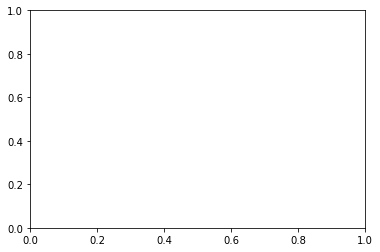

In [109]:
fig, ax = plt.subplots()

In [112]:
r1 = ax.bar(x-width/2, men, width, label='Men')
r2 = ax.bar(x-width/2, women, width, label='Women')

In [116]:
ax.set_title("Scores by group and gender")
ax.set_xlabel('Gender group')
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(r1, padding=3)
ax.bar_label(r2, padding=3)

fig.tight_layout()
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

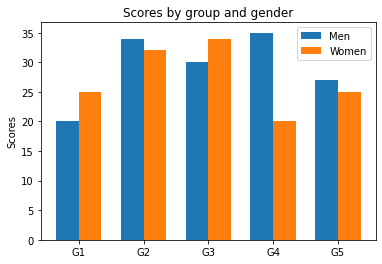

In [117]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()